In [9]:
import os, csv, re
import pandas as pd
import matplotlib.pyplot as plt


First we create an empty CSV file with the colums to fill.

In [33]:
def create_empty_csv(filename):
    csvfile = open('data/output/{0}.csv'.format(filename), "w")
    writer = csv.writer(csvfile)
    columns = ['filename', 'title', 'author', 'release year', 'pos score', 'neg score', 'neu score', 'comp score', 'amt pos', 'amt neg']
    writer.writerow(columns)

create_empty_csv('tard')


We want to be able to extract the filename, title, author and release year from every book and save it to a CSV file. 

In [34]:
def obtain_data_from_books(directory):
    
    # initiate CSV file 
    csvfile = open('data/output/tard.csv', "a")
    writer = csv.writer(csvfile)
  
    for book in os.listdir(directory):
        if not book.startswith("."):
            with open(directory + book, errors='replace') as f:
                text = f.read().splitlines()
        
        author = "NULL"
        title = "NULL"
        release_date = "NULL"
        
        # for line in text, check if title, author or release date are stored there
        for i in range(80):
            # error handling since some texts are <80 lines
            try:
                if "Title: " in text[i]:
                    title = text[i][7:]
                if "Author: " in text[i]:
                    author = text[i][8:]
                if "Release Date: " in text[i]:
                    release_date = list(map(int, re.findall('(\d{4})', text[i][14:].split('[')[0])))[0]
                # if they have both been found, do not waste extra time iterating 
                if title != "NULL" and author != "NULL" and release_date != "NULL":
                    title_author_rd_triple = (title, author, release_date)
                    pass
            except:
                pass
            
        data = [book, title, author, release_date]
        if not 'NULL' in data:
            writer.writerow(data)
            print (data)

    
directory = "data/test/"
obtain_data_from_books(directory)


['9915.txt', 'An Appeal to the Christian Women of the South', 'Angelina Emily Grimke', 2006]
['9914.txt', 'The Babylonian Legends of the Creation', 'British Museum', 2006]
['9916.txt', "Spalding's Baseball Guide and Official League Book for 1895", 'Various', 2006]
['9915-8.txt', 'An Appeal to the Christian Women of the South', 'Angelina Emily Grimk�', 2006]
['9917-8.txt', 'Your Child: Today and Tomorrow', 'Sidonie Matzner Gruenberg', 2006]
['9916-8.txt', "Spalding's Baseball Guide and Official League Book for 1895", 'Various', 2006]


Delete header and legal stuff at the beginning and end of the books. Books from the gutenberg project have certain sentences that mark the start and the end of a book. This can be exploited to extract only the content from the books that is relevant to our research. The function below does this for all books in the given directory and puts the stripped books in a new directory. The unstripped books are kept because some useful information is found in the headers (author, title, release date)

In [35]:
def remove_unwanted_text(directory, outputdir):

    # lists with sentences that either mark the end or the beginning of a book
    start_list = ("*** START OF", "***START OF")
    stop_list = ("*** END OF", "***END OF", "End of the Project")

    for book in os.listdir(directory):
        print(book)
        if not book.startswith("."):
            with open(directory + book, errors='replace') as f:
                content = f.readlines()
                
                start_index = 1
                stop_index = len(content) - 1

                for line in range(len(content)):

                    if any(item in content[line] for item in start_list):
                        start_index = line + 1
                    #if stop1 or stop2 or stop3 in content[line]:
                    if any(item in content[line] for item in stop_list):
                        stop_index = line - 2

                book_content = content[start_index:stop_index]
                outfile = open(outputdir + '/' + book, 'w')
                outfile.writelines(book_content)
                outfile.close()
        

directory = "data/test/"
outputdir = "data/output/"
remove_unwanted_text(directory, outputdir)
   

.DS_Store
9915.txt
9914.txt
9916.txt
9915-8.txt
9917-8.txt
9916-8.txt


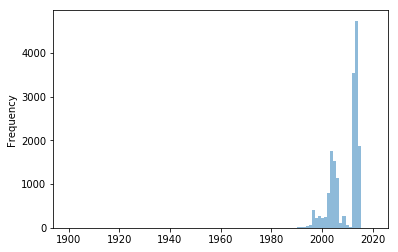

In [24]:
data = pd.read_csv('data/output/tard.csv', index_col=0)
data['release year'].plot.hist(alpha=0.5, bins=100, range=[1900,2020])
plt.show()